In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
warnings.filterwarnings("ignore")

### Dataset Description -
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

- 4 columns, 306 rows
- Attribute Information:

  -  Age of patient at time of operation (numerical)
  - Patient's year of operation (year - 1900, numerical)
  - Number of positive axillary nodes detected (numerical)
  - Survival status (class attribute)
     - 1 = the patient survived 5 years or longer
     - 2 = the patient died within 5 year

In [113]:
df = pd.read_csv(r"C:\Users\admin\Downloads\haberman.csv", header=None, 
                      names=['Age','Op_Year','axil_nodes','Surv_status'])
df.head()

# Columns- Age, Operation year(Op_Year), Axiliary Nodes Detected(axil_nodes), 
# Survival Status(Surv_status) - 1 = the patient survives 5 years or longer
#                                2 = the patient died within 5 years

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [114]:
df.tail()

,Age,Op_Year,axil_nodes,Surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [115]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [117]:
df.shape

(306, 4)

In [118]:
df["Surv_status"].value_counts()

# Unbalaced dataset

1    225
2     81
Name: Surv_status, dtype: int64

### EDA

#### Univariate

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

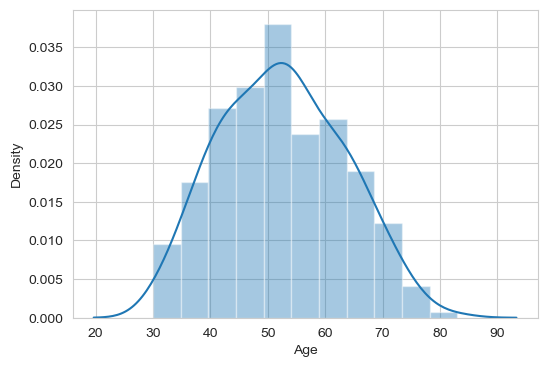

In [119]:
plt.figure(figsize=(6,4))
sns.distplot(df['Age'])

##### Conclusion - 
most people are from the age group between 40 to 65

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Op_Year'>

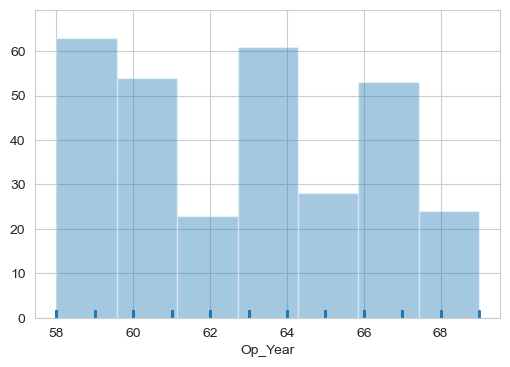

In [120]:
plt.figure(figsize=(6,4))
sns.distplot(df["Op_Year"], kde=False, rug=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='axil_nodes'>

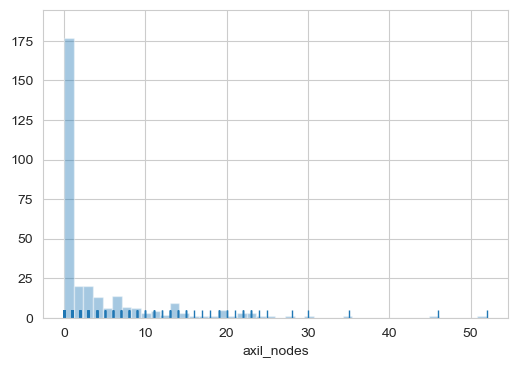

In [121]:
plt.figure(figsize=(6,4))
sns.distplot(df["axil_nodes"], kde=False, rug=True)

##### Conclusion -
Most number of positive axiliary nodes found are from 0 to 4

<AxesSubplot:>

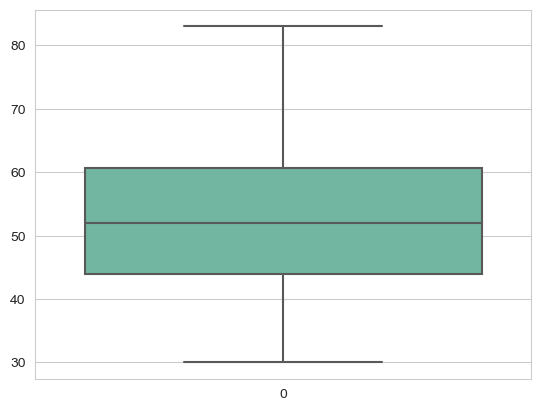

In [123]:
sns.boxplot(data=df["Age"], palette="Set2")

<AxesSubplot:>

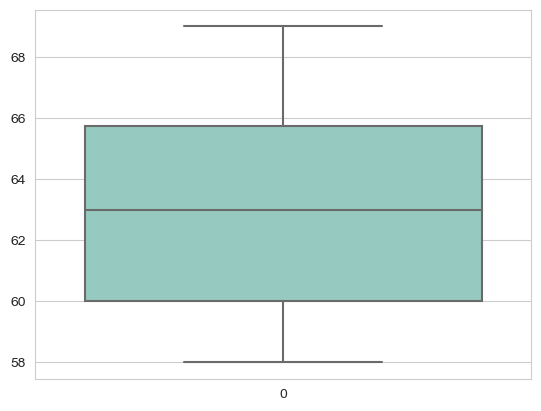

In [124]:
sns.boxplot(data=df["Op_Year"], palette="Set3")

<AxesSubplot:>

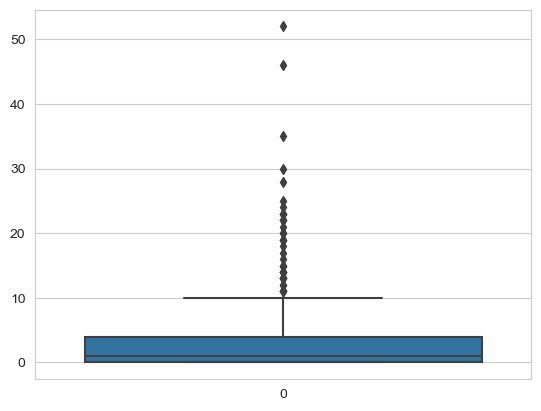

In [125]:
sns.boxplot(data=df["axil_nodes"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surv_status', ylabel='count'>

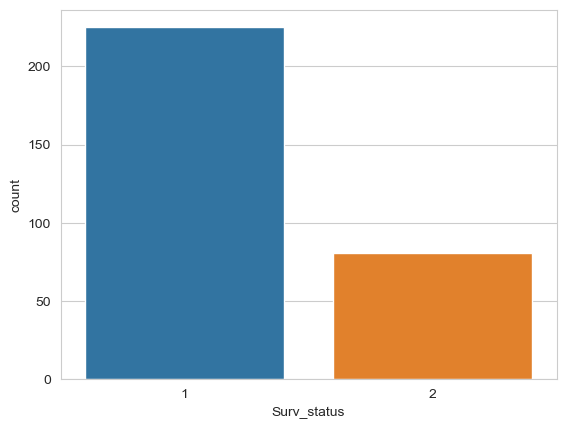

In [126]:
sns.countplot(df["Surv_status"])

#### Bivariate Distribution

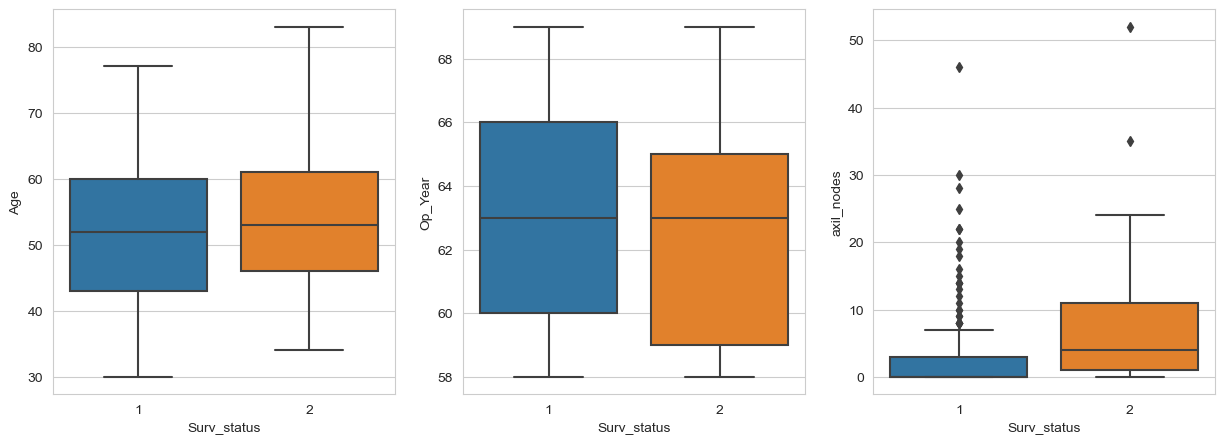

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='Surv_status', y=feature, data=df, ax=axes[idx])
plt.show()  

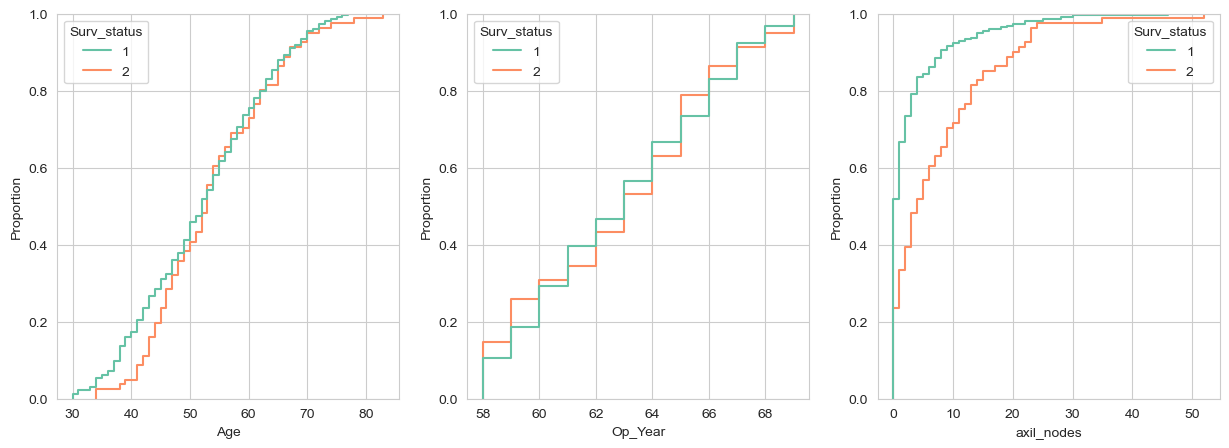

In [143]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for idx, feature in enumerate(list(df.columns[:-1])):
    sns.ecdfplot(x=feature, data=df, hue='Surv_status', palette='Set2', ax=axes[idx])


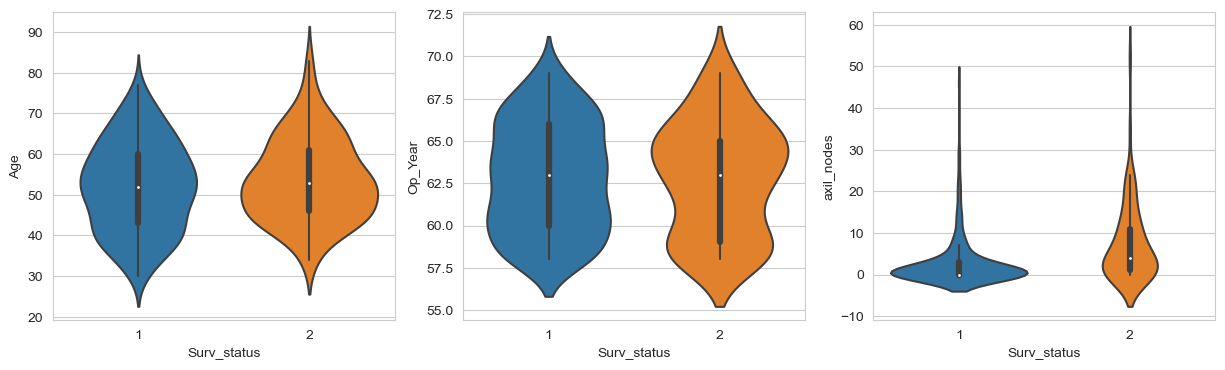

In [138]:
fig, axes= plt.subplots(1,3, figsize=(15,4))
for idx, feature in enumerate(list(df.columns[:-1])):
    sns.violinplot(x="Surv_status", y=feature, data=df, ax=axes[idx])
plt.show()

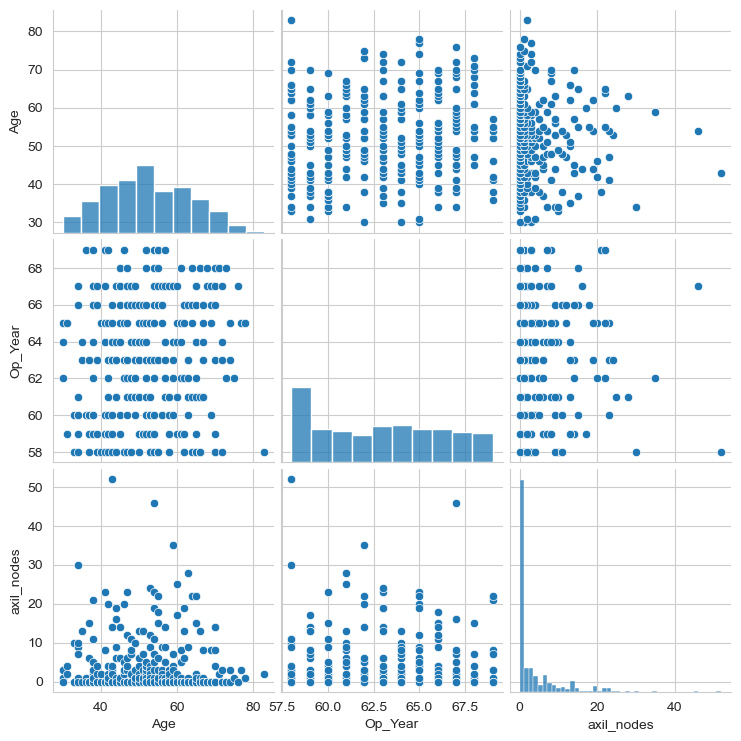

In [127]:
sns.pairplot(df[["Age", "Op_Year", "axil_nodes"]])

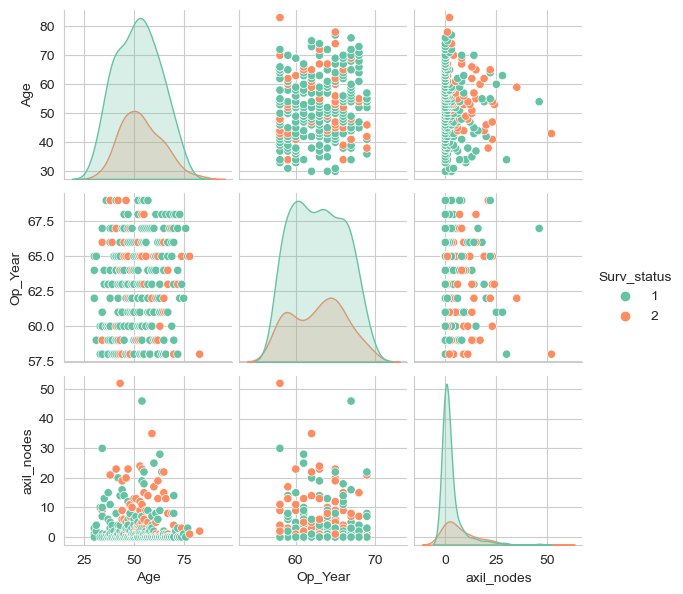

In [128]:
sns.pairplot(df, hue = 'Surv_status', height = 2, palette='Set2')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


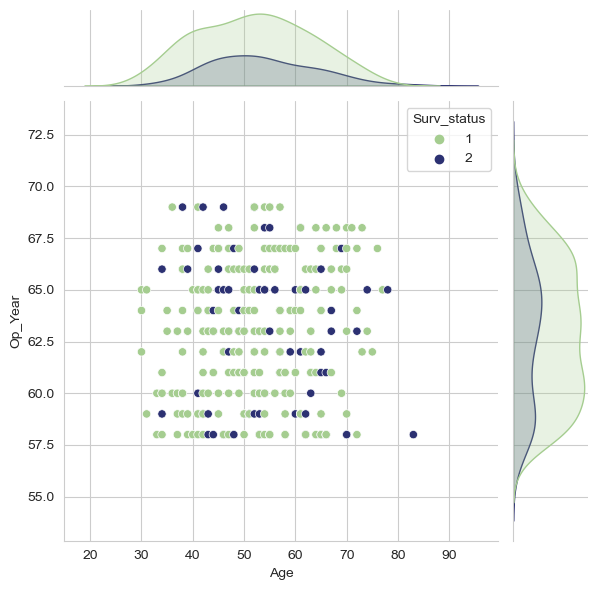

In [149]:
sns.jointplot(df["Age"], df["Op_Year"], kind='scatter', hue=df["Surv_status"], palette='crest')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


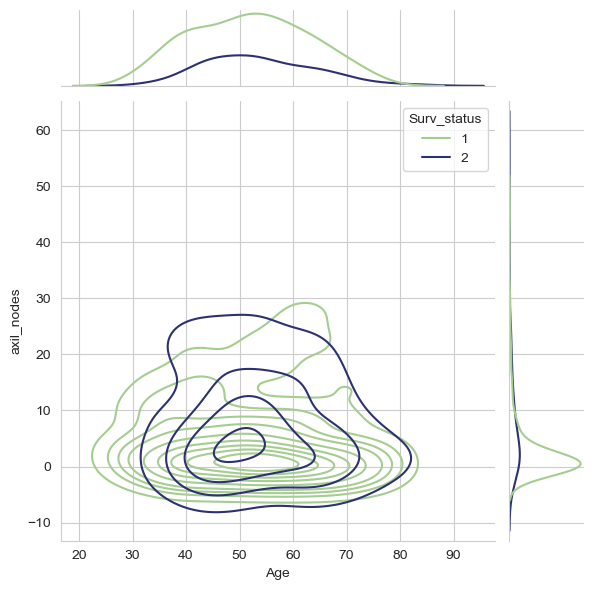

In [147]:
sns.jointplot(df["Age"], df["axil_nodes"], kind='kde', hue=df["Surv_status"], palette='crest')

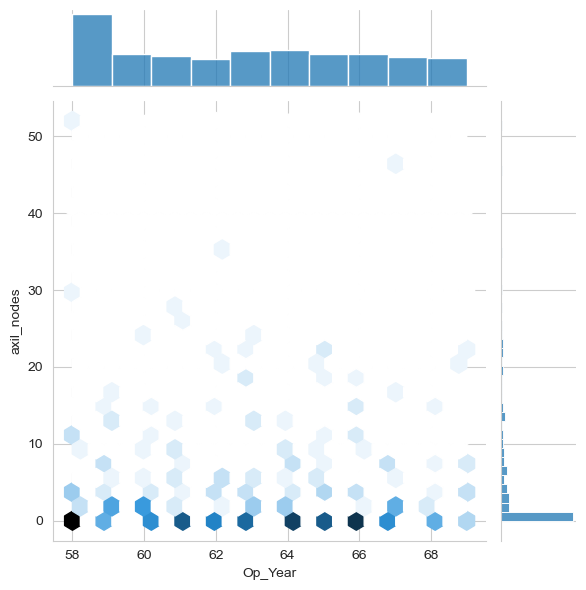

In [151]:
sns.jointplot(df["Op_Year"], df["axil_nodes"], kind='hex')

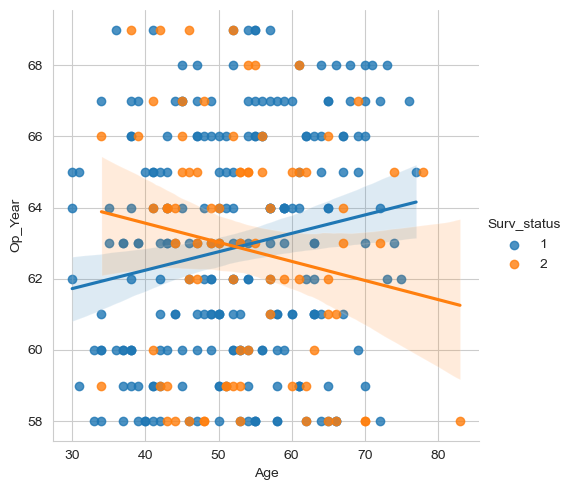

In [132]:
sns.lmplot(x="Age", y="Op_Year", data=df, hue='Surv_status')

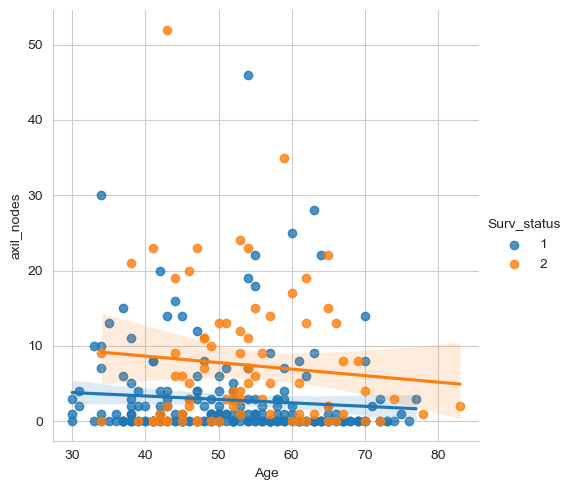

In [133]:
sns.lmplot(x="Age", y="axil_nodes", data=df, hue='Surv_status')

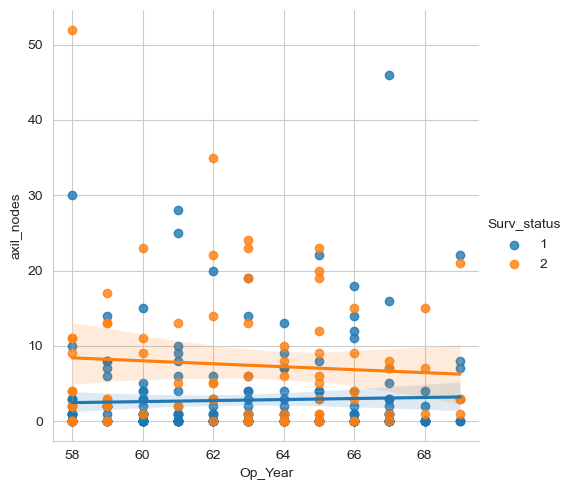

In [134]:
sns.lmplot(x="Op_Year", y="axil_nodes", data=df, hue="Surv_status")

<AxesSubplot:>

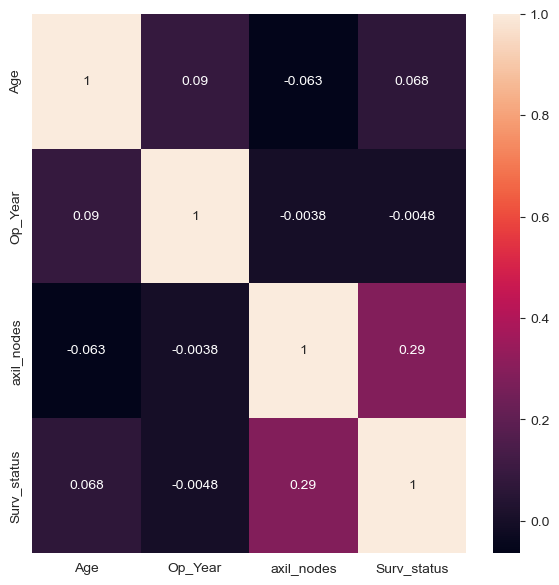

In [139]:
plt.figure(figsize=(7,7))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [145]:
df.groupby('Surv_status')['Op_Year'].value_counts().unstack()

Op_Year,58,59,60,61,62,63,64,65,66,67,68,69
Surv_status,,,,,,,,,,,,
1,24,18,24,23,16,22,23,15,22,21,10,7
2,12,9,4,3,7,8,8,13,6,4,3,4
